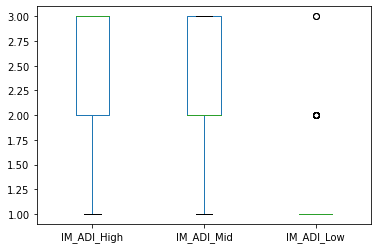

In [10]:
# load packages
import pandas as pd
# load data file
d = pd.read_excel("/Users/adhyadagar/Desktop/ANOVA.xlsx")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['IM_ADI_High', 'IM_ADI_Mid', 'IM_ADI_Low'], grid=False)

In [11]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['IM_ADI_High'], d['IM_ADI_Mid'], d['IM_ADI_Low'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05



148.25030826140556 1.9233239671841404e-46


In [15]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['IM_ADI_High', 'IM_ADI_Mid', 'IM_ADI_Low'])
# replace column names
d_melt.columns = ['index', 'LevelOfInboundMigration', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(LevelOfInboundMigration)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LevelOfInboundMigration),108.941896,2.0,148.250308,1.923324e-46
Residual,119.045872,324.0,NaN,NaN


In [16]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['LevelOfInboundMigration'], alpha=0.05)
print(m_comp)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1     group2   meandiff p-adj  lower   upper  reject
------------------------------------------------------------
IM_ADI_High IM_ADI_Low  -1.3945 0.001 -1.5878 -1.2012   True
IM_ADI_High IM_ADI_Mid  -0.4954 0.001 -0.6887 -0.3021   True
 IM_ADI_Low IM_ADI_Mid   0.8991 0.001  0.7057  1.0924   True
------------------------------------------------------------
